Imports and load data

In [1]:
#import the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn


In [2]:
#load the dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

Exploratory data analysis

In [3]:
#check the shape of the dataset
for i in (x_train, y_train, x_test, y_test):
    print(i.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#check the shape of a single image
x_train[0].shape

(28, 28)

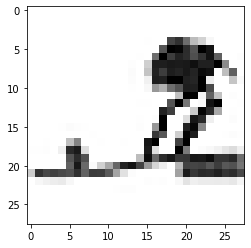

In [5]:
#show train image at index i
i = 777
plt.imshow(x_train[i],cmap='Greys') 

In [6]:
#train image at index i belongs to class 5 (sandal)
y_train[i] 

5

Image preprocessing

In [7]:
#check maximum value of rgb code
x_train[0].max() 

255

In [8]:
#normalize the images by dividing them with the maximum rgb code
x_train = x_train/255
x_test = x_test/255

In [9]:
#reshape the images to 4 dimension so that it works  with Keras API
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [10]:
#convert the target class vector (integers) to binary class matrix
y_cat_train = tf.keras.utils.to_categorical(y_train)
y_cat_test = tf.keras.utils.to_categorical(y_test)

Create the model

In [11]:
#split the train data to train and validation set
from sklearn.model_selection import train_test_split
x_train, val_x, y_cat_train, val_y = train_test_split(x_train, y_cat_train, test_size=0.1, random_state=42)

In [12]:
val_y.shape

(6000, 10)

In [13]:
#create base sequential model then add layers
model = tf.keras.models.Sequential()

#add a convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid',activation='relu',input_shape=(28,28,1)))

#add a pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#add a second convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='valid',activation='relu'))

#add a second pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#flatten the 2D arrays for a fully connected model
model.add(tf.keras.layers.Flatten())

#add 3 dense layers with a rectified linear unit activation function
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

model.add(tf.keras.layers.Dense(units=64,activation='relu'))

model.add(tf.keras.layers.Dense(units=32,activation='relu'))

#add a dropout layer with a 20% rate
model.add(tf.keras.layers.Dropout(rate=0.2))

#add a last dense layer with 10 neurons for each target class with a softmax activation function
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#compile the model
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [14]:
#check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [15]:
#create a callback 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [16]:
#fit the model
model.fit(x_train,y_cat_train,epochs=15,callbacks=[early_stop],validation_data=(val_x,val_y))

Epoch 1/15
1688/1688 [==============================] - 81s 47ms/step - loss: 0.6473 - accuracy: 0.7666 - val_loss: 0.3930 - val_accuracy: 0.8537
Epoch 2/15
1688/1688 [==============================] - 75s 45ms/step - loss: 0.3868 - accuracy: 0.8631 - val_loss: 0.3419 - val_accuracy: 0.8705
Epoch 3/15
1688/1688 [==============================] - 70s 41ms/step - loss: 0.3295 - accuracy: 0.8837 - val_loss: 0.2814 - val_accuracy: 0.8950
Epoch 4/15
1688/1688 [==============================] - 74s 44ms/step - loss: 0.2930 - accuracy: 0.8946 - val_loss: 0.2733 - val_accuracy: 0.8988
Epoch 5/15
1688/1688 [==============================] - 79s 47ms/step - loss: 0.2606 - accuracy: 0.9078 - val_loss: 0.2720 - val_accuracy: 0.9035
Epoch 6/15
1688/1688 [==============================] - 82s 49ms/step - loss: 0.2420 - accuracy: 0.9127 - val_loss: 0.2733 - val_accuracy: 0.9032
Epoch 7/15
1688/1688 [==============================] - 92s 55ms/step - loss: 0.2228 - accuracy: 0.9187 - val_loss: 0.2740 -

Evaluate the model

In [17]:
#request the model history
metrics = pd.DataFrame(model.history.history)

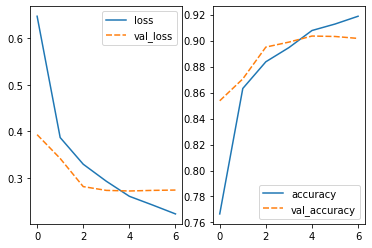

In [18]:
#plot the monitored metrics
fig, ax = plt.subplots(1,2)
sns.lineplot(data=metrics[['loss','val_loss']],ax=ax[0])
sns.lineplot(data=metrics[['accuracy','val_accuracy']],ax=ax[1])
plt.show()

In [19]:
#print the accuracy of the model on train, validation and test set
print(f"Train accuracy: {model.evaluate(x_train,y_cat_train,verbose=False)}")
print(f"Validation accuracy: {model.evaluate(val_x,val_y,verbose=False)}")
print(f"Test accuracy: {model.evaluate(x_test,y_cat_test,verbose=False)}")

Train accuracy: [0.2211410254240036, 0.9203703999519348]
Validation accuracy: [0.2720002233982086, 0.9035000205039978]
Test accuracy: [0.2929202914237976, 0.8931000232696533]


In [20]:
#make predictions on the test set
predictions = np.argmax(model.predict(x_test),axis=1)

In [21]:
#print the classification report
print(sklearn.metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.84      0.85      1000
           3       0.87      0.92      0.90      1000
           4       0.81      0.86      0.83      1000
           5       0.93      0.99      0.96      1000
           6       0.72      0.66      0.69      1000
           7       0.96      0.91      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<AxesSubplot:>

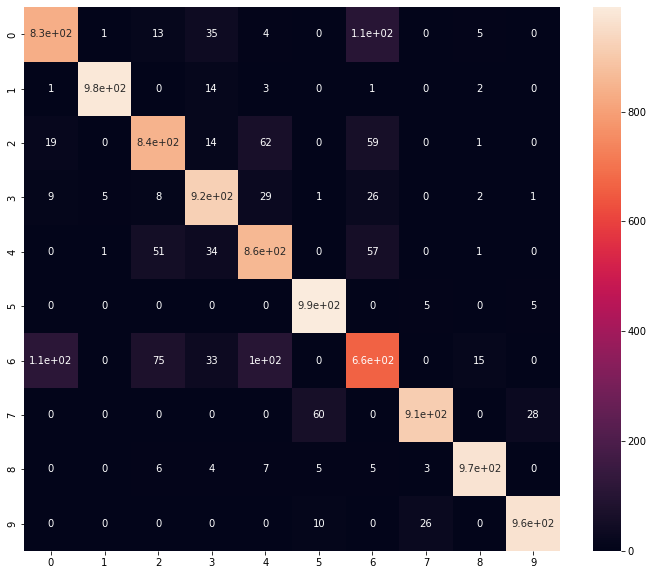

In [22]:
#visualize the heatmap of the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(sklearn.metrics.confusion_matrix(y_test,predictions),annot=True)

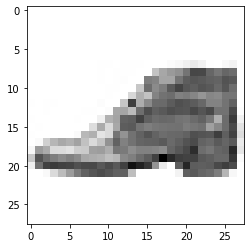

In [23]:
#make predictions for test item at index i
test_item_index = 456
test_item = x_test[test_item_index]
plt.imshow(test_item,cmap='Greys') #show image at index i 

In [24]:
#make prediction
np.argmax(model.predict(test_item.reshape(1,28,28,1)),axis=1) 

array([9])

In [25]:
#actual label of predicted item
y_test[test_item_index]

9

Model has predicted correctly.